In [147]:
ls

FudanPed00001_mask.png  FudanPed00058_mask.png  PennPed00041_mask.png
FudanPed00002_mask.png  FudanPed00059_mask.png  PennPed00042_mask.png
FudanPed00003_mask.png  FudanPed00060_mask.png  PennPed00043_mask.png
FudanPed00004_mask.png  FudanPed00061_mask.png  PennPed00044_mask.png
FudanPed00005_mask.png  FudanPed00062_mask.png  PennPed00045_mask.png
FudanPed00006_mask.png  FudanPed00063_mask.png  PennPed00046_mask.png
FudanPed00007_mask.png  FudanPed00064_mask.png  PennPed00047_mask.png
FudanPed00008_mask.png  FudanPed00065_mask.png  PennPed00048_mask.png
FudanPed00009_mask.png  FudanPed00066_mask.png  PennPed00049_mask.png
FudanPed00010_mask.png  FudanPed00067_mask.png  PennPed00050_mask.png
FudanPed00011_mask.png  FudanPed00068_mask.png  PennPed00051_mask.png
FudanPed00012_mask.png  FudanPed00069_mask.png  PennPed00052_mask.png
FudanPed00013_mask.png  FudanPed00070_mask.png  PennPed00053_mask.png
FudanPed00014_mask.png  FudanPed00071_mask.png  PennPed00054_mask.png
FudanPed00015_mask.p

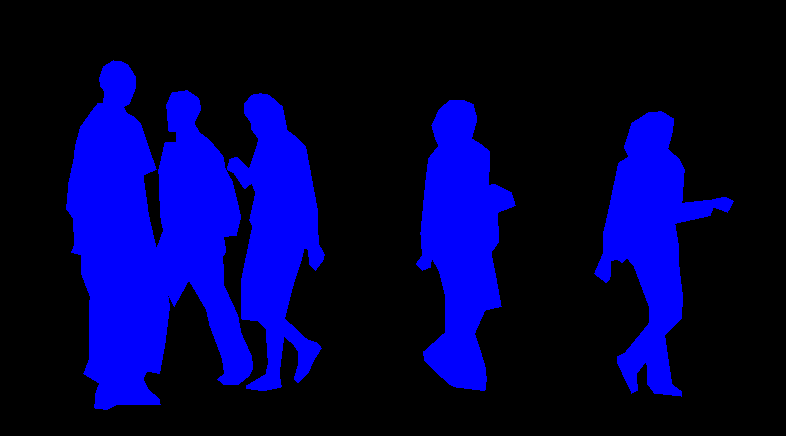

In [149]:
from PIL import Image, ImageDraw

mask = Image.open("PennPed00004_mask.png")
mask.putpalette([
    0,0,0,
    0,0,255
]
)
mask

In [150]:
import numpy as np

np_mask = np.array(mask)
ids = np.unique(np_mask)
people_ids = ids[1:]

masks = np_mask == people_ids[:, None, None]


In [151]:
masks[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [152]:
pos = np.where(masks[0])
xmin = np.min(pos[1])
ymin = np.min(pos[0])
xmax = np.max(pos[1])
ymax = np.max(pos[0])

print(pos)
print(xmin, ymin, xmax, ymax)
print(mask.width, mask.height)

(array([ 60,  61,  61, ..., 409, 409, 409]), array([113, 111, 112, ..., 105, 106, 107]))
66 60 169 409
786 436


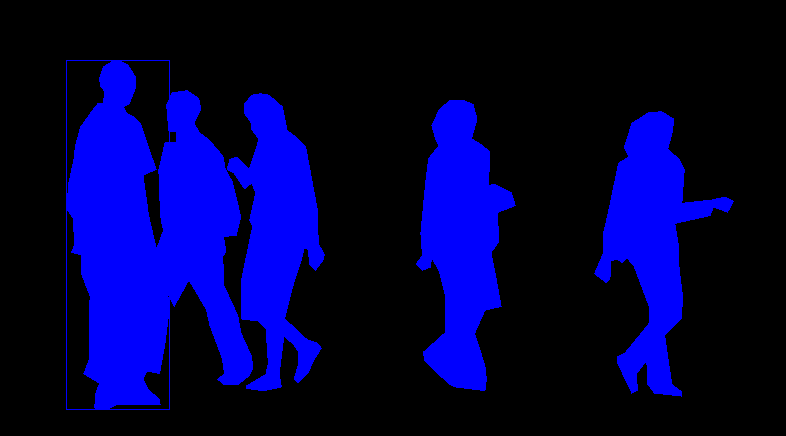

In [153]:
draw = ImageDraw.Draw(mask)
draw.rectangle([(xmin, ymin),(xmax,ymax)], outline=1)
mask